#   Credit Fraud Detection: Prediction/Analysis
----

In this project, I analyze instances of credit fraud using python and attempt to discriminate between licit and illicit transactions through supervised machine learning. The dataset consists of transactions made in late 2013 by European customers. I obtained the dataset from the publically available Kaggle site. 

In [29]:
## import programs
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
## dataset url = https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv

In [31]:
## initialize dataset
credit = pd.read_csv('credit_card.csv', engine='python')

In [32]:
## dataset information
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [33]:
## first 5 rows of the dataset
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
## check for missing values
print("missing values:", credit.isnull().values.any())

missing values: False


In [35]:
## summarize all amount values
print(credit['Amount'].describe())

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [36]:
## summarize fraudulent amount values
fraud_sum = credit[credit.Class == 1]
fraud_sum['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [37]:
## summarize nonfraudulent amount values
no_fraud = credit[credit.Class == 0]
no_fraud['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### <span style='font-family:"Times New Roman"'> <span styel=''> The average purchase across all transactions was $88.34 and the maximum purchase was $25691.16. The mean and max fraudulent purchases were $122.21 and $2125.87, while the mean and max nonfraudulent purchases were $88.29 and $25691.16

In [38]:
## separate fraud and no fraud instances
fraud = credit[credit.Class == 1]
no_fraud = credit[credit.Class == 0]
amount = len(fraud)/float(len(no_fraud))
print(amount)
print('There are {} fraudulent occurences'.format(len(credit[credit['Class'] == 1])))
print('There are {}  nonfraudulent occurences'.format(len(credit[credit['Class'] == 0])),"\n")

0.0017304750013189597
There are 492 fraudulent occurences
There are 284315  nonfraudulent occurences 



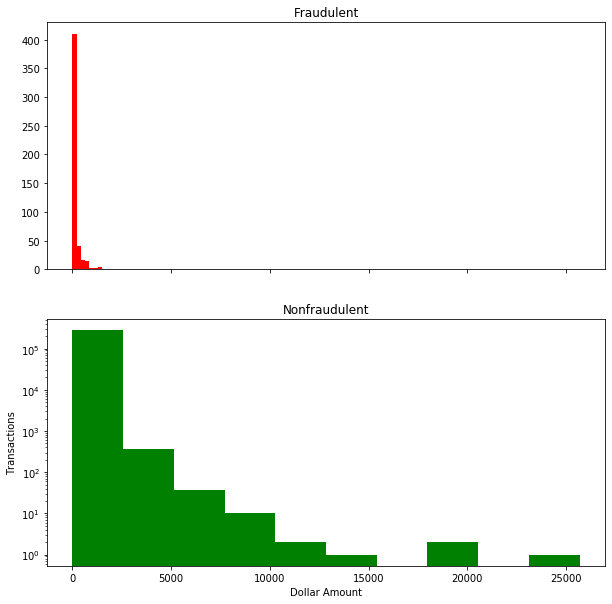

In [39]:
## visualization of transactions by dollar amount
figure, (axis_1, axis_2) = plt.subplots(2, 1, sharex = True, figsize = (10, 10))

bins = 10

axis_1.hist(credit.Amount[credit.Class == 1], bins = bins, color = 'red')
axis_1.set_title('Fraudulent')

axis_2.hist(credit.Amount[credit.Class == 0], bins = bins, color = 'green')
axis_2.set_title('Nonfraudulent')

plt.xlabel('Dollar Amount')
plt.ylabel('Transactions')
plt.yscale('log')
plt.show()

###  <span style='font-family:"Times New Roman"'> <span styel=''> Fraudulent transactions were mostly limited to smaller values when compared to nonfraudulent transactions.

In [40]:
## split into train and test sets
x = credit.iloc[:, :-1].values
y = credit.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [41]:
## retreive the accuracy score using DecisionTreeClassifier 
classifier = DecisionTreeClassifier(max_depth = 4)
classifier = classifier.fit(x_train, y_train)
predicted_value = classifier.predict(x_test)
decision_tree = metrics.accuracy_score(y_test, predicted_value) * 100
print("\nThe DecisionTreeClassifier accuracy score is {}".format(decision_tree))


The DecisionTreeClassifier accuracy score is 99.95611109160492


In [42]:
## retreive the precision score
precisionscore = precision_score(y_test, predicted_value, pos_label = 1)
p = precision_score(y_test, predicted_value, pos_label = 1)

In [43]:
## retrieve the recall score
recallscore = recall_score(y_test, predicted_value, pos_label = 1)
r = recall_score(y_test, predicted_value, pos_label = 1)

In [44]:
## retrieve the f-score
f = f1_score(y_test, predicted_value, pos_label = 1)

In [45]:
## print the scores
print('The precision score is {}'.format(p))
print('The recall score is {}'.format(r))
print('The f-score value is {}'.format(f))

The precision score is 0.8902439024390244
The recall score is 0.8202247191011236
The f-score value is 0.8538011695906433
